In [67]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import brown
nltk.download('brown')
import collections

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


#### EX1

In [6]:
# a
x = [random.randint(2, 12) for i in range(10000)]# sum of two times launch 2 dice varies from 2 - 12
# b
X = set(x)
# c
P = [x.count(i)/ len(x) for i in X]

In [31]:
print(P)

[0.0913, 0.0923, 0.0904, 0.0918, 0.0972, 0.0844, 0.0882, 0.0938, 0.0846, 0.0912, 0.0948]


In [22]:
# d 
# expectation of X
rv = list(X)
EX = 0
for i in range(len(X)):
  EX = EX + (rv[i]*P[i])

print(EX)

6.9906999999999995


In [29]:
# variance
variance = 0
for i in range(len(X)):
  variance = variance + (rv[i] - EX) ** 2 * P[i]

print(variance)

10.09121351


In [30]:
# standard devieation
import math
stdev = math.sqrt(variance)
stdev

3.1766670442462175

---
#### EX2


In [ ]:
# Normal distribution


In [63]:
def pmf_normal(x, mu, sigma):
  result = 1 / (math.sqrt(2* math.pi) * sigma) * math.exp( -( x - mu)**2 / (2 * (sigma ** 2)) )
  return result


def cdf_normal(x, mu, sigma):
  result = 1
  for i in range(len(rv)):
    if rv[i] > x:
      break
    else:
      result += P[i]
  return result

In [66]:
pmf = [pmf_normal(v, EX, stdev) for v in rv]
print(pmf)
cdf = [cdf_normal(v, EX, stdev) for v in rv]
print(cdf)

[0.03655750541345769, 0.05704825056942135, 0.08062527619291632, 0.10319608135325284, 0.1196239953639563, 0.1255846348442284, 0.11940370897136629, 0.10281636219392272, 0.08018068398871164, 0.056629194743678384, 0.03622214142361372]
[1.0913, 1.1836, 1.274, 1.3658000000000001, 1.463, 1.5474, 1.6356000000000002, 1.7294, 1.814, 1.9052, 2.0]


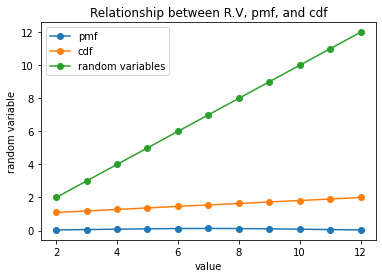

In [71]:
plt.plot(rv, pmf, marker = 'o')
plt.plot(rv, cdf, marker = 'o')
plt.plot(rv, rv, marker = 'o')

plt.legend(labels = ['pmf', 'cdf','random variables'])
plt.title('Relationship between R.V, pmf, and cdf')
plt.xlabel('value')
plt.ylabel('random variable')
plt.show()

In [73]:
# 2-c


---
#### EX3

In [56]:
company = pd.read_csv('company-sales_data.csv')

In [36]:
toothpaste, shampoo, facecream = company['toothpaste'], company['shampoo'], company['facecream']

In [37]:
month = company['month_number']

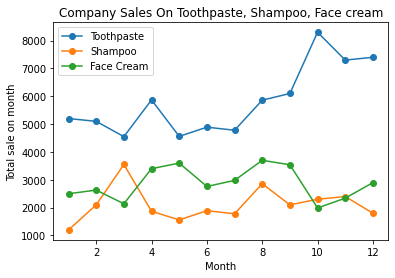

In [40]:
plt.plot(month, toothpaste, marker = 'o')
plt.plot(month, shampoo, marker = 'o')
plt.plot(month, facecream, marker = 'o')
plt.legend(labels = ['Toothpaste', 'Shampoo','Face Cream'])
plt.title('Company Sales On Toothpaste, Shampoo, Face cream')
plt.xlabel('Month')
plt.ylabel('Total sale on month')
plt.show()

----
#### EX4

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [44]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [51]:
rom_text = brown.words(categories='romance')
signs = [',', '.', ':', ';', "''", "``", "--", "?", "!"]
long_text = [w.lower() for w in rom_text if w not in signs]

In [52]:
most_30 = collections.Counter(long_text).most_common(30)
word = [w for w, _ in most_30]
frq =  [f for _, f in most_30]

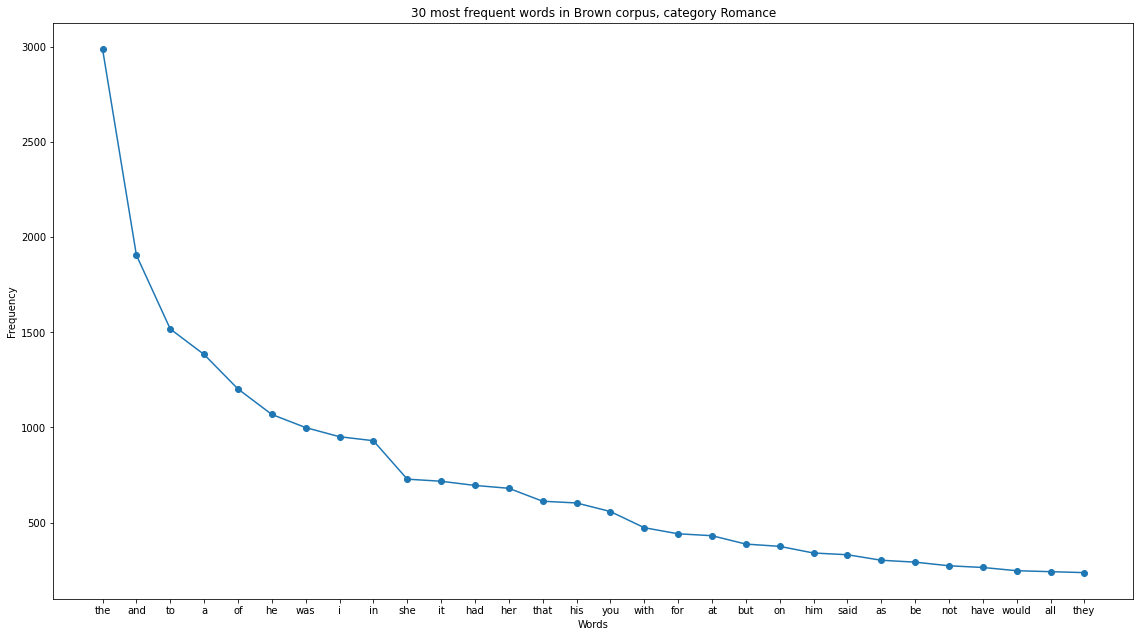

In [54]:
n30 = [i for i in range(1, 31)]
fig = plt.figure(figsize = (15, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(n30)
ax.set_xticklabels(word)
ax.set_title('30 most frequent words in Brown corpus, category Romance')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.plot(n30, frq, marker = 'o')
